# Getting started

## Line charts

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.random.randint(1, 20, size = 10)
data

array([ 9, 15,  9, 18,  8, 18, 17, 14,  4,  7])

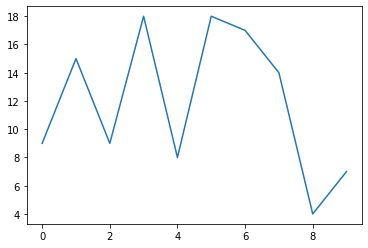

In [4]:
plt.plot(data)

In [2]:
import helper

precip_2018 = helper.precip_sums_for_year()
precip_2018 = [month[1] for month in precip_2018]
precip_2018

[3.92,
 1.7000000000000002,
 4.800000000000001,
 5.35,
 5.12,
 1.98,
 4.919999999999999,
 6.619999999999999,
 7.9700000000000015,
 4.579999999999999,
 7.1,
 6.2299999999999995]

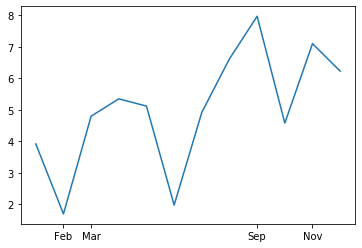

In [7]:
plt.plot(precip_2018)
plt.xticks(ticks=np.array([1,2,8,10]), labels=helper.MONTHS[[1,2,8,10]]);

In [8]:
low_precip = np.argmin(precip_2018)
high_precip = np.argmax(precip_2018)
helper.MONTHS

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype='<U3')

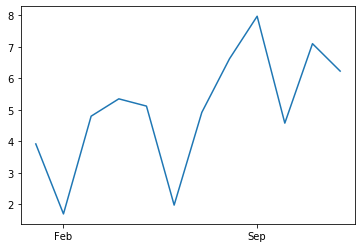

In [9]:
plt.plot(precip_2018)
plt.xticks(ticks=np.array([low_precip, high_precip]), labels=helper.MONTHS[[low_precip, high_precip]]);

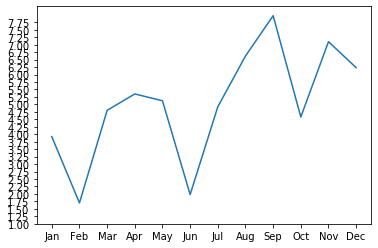

In [10]:
import math
lower = math.floor(precip_2018[low_precip])
upper = math.ceil(precip_2018[high_precip])
precip_ticks = np.arange(lower, upper, 0.25)
plt.plot(precip_2018)
plt.xticks(ticks=np.arange(len(precip_2018)), labels=helper.MONTHS)
plt.yticks(ticks=precip_ticks);

## Histograms

In [11]:
helper.weather[0].keys()

dict_keys(['fogground', 'snowfall', 'dust', 'snowdepth', 'mist', 'drizzle', 'hail', 'fastest2minwindspeed', 'thunder', 'glaze', 'snow', 'ice', 'fog', 'temperaturemin', 'fastest5secwindspeed', 'freezingfog', 'temperaturemax', 'blowingsnow', 'freezingrain', 'rain', 'highwind', 'date', 'precipitation', 'fogheavy', 'smokehaze', 'avgwindspeed', 'fastest2minwinddir', 'fastest5secwinddir'])

In [15]:
jan_temps = helper.monthly_data_by_key(month=1, key='temperaturemax')
jan_temps[0:10]

[35.1, 39.0, 64.0, 73.0, 68.0, 42.1, 51.1, 55.0, 73.0, 52.0]

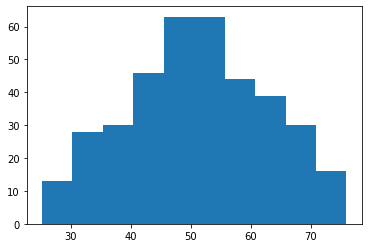

In [16]:
y, x, _, = plt.hist(jan_temps)

In [19]:
x

array([25.2 , 30.27, 35.34, 40.41, 45.48, 50.55, 55.62, 60.69, 65.76,
       70.83, 75.9 ])

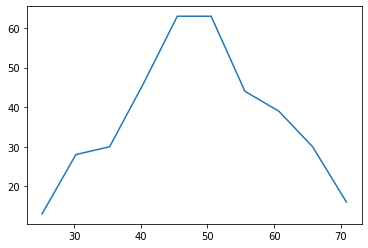

In [20]:
plt.plot(x[:-1], y)

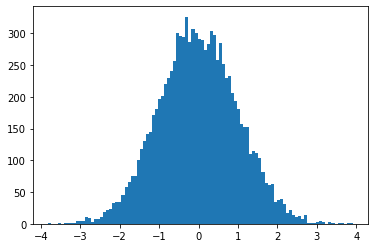

In [21]:
data = np.random.randn(10000)
plt.hist(data, bins=100);

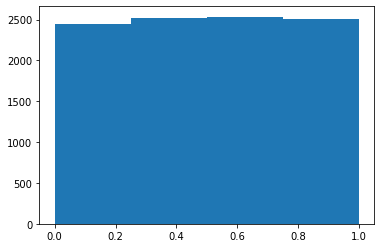

In [22]:
data = np.random.uniform(size=10000)
plt.hist(data, bins=4);

## Bar charts

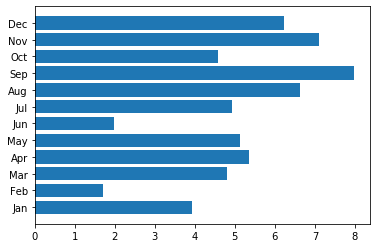

In [23]:
precip_sums_2018 = helper.precip_sums_for_year()
plt.barh(np.arange(len(helper.MONTHS)), [month[1] for month in precip_sums_2018]);
plt.yticks(ticks=np.arange(len(helper.MONTHS)), labels=helper.MONTHS);

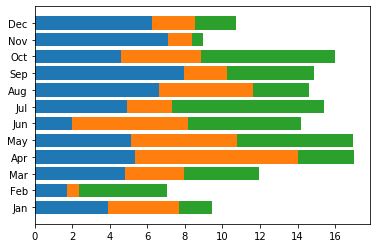

In [24]:
precip_sums_2017 = helper.precip_sums_for_year(year=2017)
precip_sums_2016 = helper.precip_sums_for_year(year=2016)

values_2018 = np.array([month[1] for month in precip_sums_2018])
values_2017 = np.array([month[1] for month in precip_sums_2017])
values_2016 = np.array([month[1] for month in precip_sums_2016])

plt.barh(np.arange(len(helper.MONTHS)), values_2018)
plt.barh(np.arange(len(helper.MONTHS)), values_2017, left=values_2018)
plt.barh(np.arange(len(helper.MONTHS)), values_2016, left=values_2018 + values_2017);
plt.yticks(ticks=np.arange(len(helper.MONTHS)), labels=helper.MONTHS);

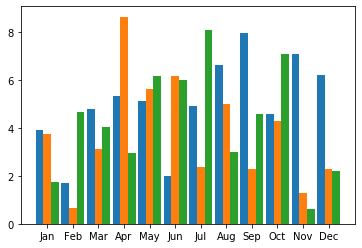

In [25]:
group_width = 0.9

plt.bar(np.arange(len(helper.MONTHS)) - group_width / 3, values_2018, group_width / 3)
plt.bar(np.arange(len(helper.MONTHS)), values_2017, group_width / 3)
plt.bar(np.arange(len(helper.MONTHS)) + group_width / 3, values_2016, group_width / 3)
plt.xticks(ticks=np.arange(len(helper.MONTHS)), labels=helper.MONTHS);

## Pie Chart

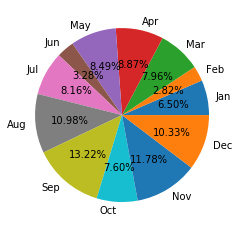

In [26]:
precip_2018 = helper.precip_sums_for_year()
totals = [month[1] for month in precip_2018]
plt.pie(totals, labels=helper.MONTHS, autopct='%.2f%%');

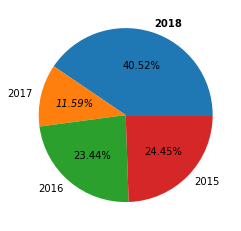

In [28]:
precip_2017 = helper.precip_sums_for_year(year=2017)
precip_2016 = helper.precip_sums_for_year(year=2016)
precip_2015 = helper.precip_sums_for_year(year=2015)

sept_precip = [month[8][1] for month in [precip_2018, precip_2017, precip_2016, precip_2015]]
labels = ['2018', '2017', '2016', '2015']

_, years, pcts = plt.pie(sept_precip, autopct='%.2f%%', labels=labels)
years[0].set_fontweight('bold')
pcts[1].set_fontstyle('italic')

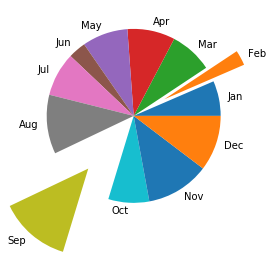

In [29]:
explosions = np.zeros(12)
min_position = np.argmin(totals)
explosions[min_position] = 0.4
explosions[np.argmax(totals)] = 0.8
plt.pie(totals, labels=helper.MONTHS, explode=explosions);

## Scatterplot

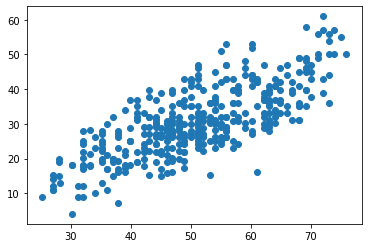

In [30]:
max_temps = helper.monthly_data_by_key(month=1, key='temperaturemax')
min_temps = helper.monthly_data_by_key(month=1, key='temperaturemin')
plt.scatter(max_temps, min_temps)

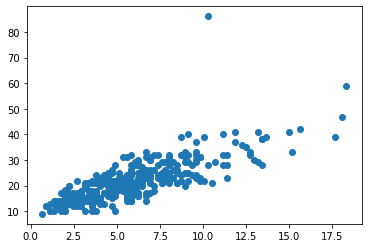

In [31]:
avg_wind = helper.monthly_data_by_key(month=1, key='avgwindspeed')
fast_wind = helper.monthly_data_by_key(month=1, key='fastest5secwindspeed')
plt.scatter(avg_wind, fast_wind)

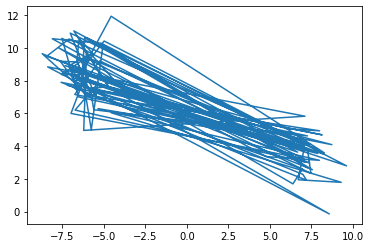

In [32]:
from sklearn.datasets import make_blobs
data = make_blobs()
points = data[0]
x, y = points[:, 0], points[:, 1]
plt.plot(x, y)

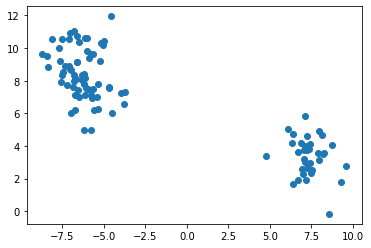

In [33]:
plt.scatter(x, y)

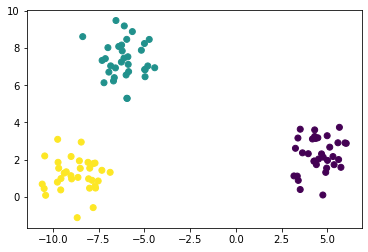

In [34]:
data = make_blobs()
points = data[0]
plt.scatter(points[:, 0], points[:, 1], c=data[1])

# Customizing visualizations

## Color

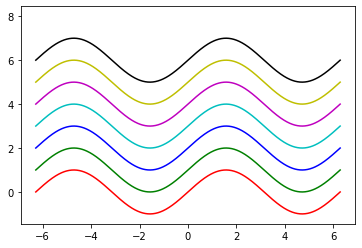

In [35]:
x = np.linspace(-np.pi * 2, np.pi * 2, 721)
y = np.sin(x)
for offset, color in zip(np.arange(8), list('rgbcmykw')):
    plt.plot(x, y + offset, c=color);

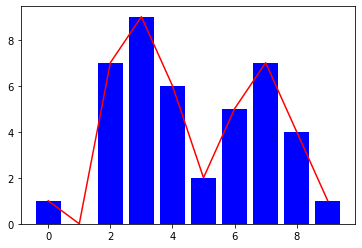

In [36]:
data = np.random.randint(0, 10, 10)
plt.bar(np.arange(len(data)), data, color='b')
plt.plot(data, c='r');

## Line styles

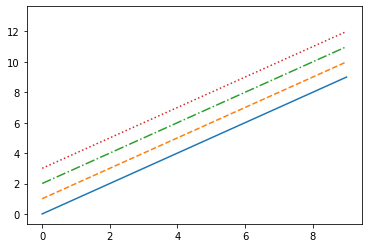

In [37]:
styles = ['solid', 'dashed', 'dashdot', 'dotted', 'None']
for index, style in enumerate(styles):
    plt.plot(np.arange(10) + index, linestyle=style);

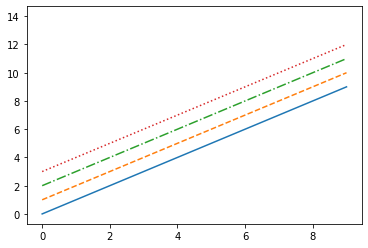

In [38]:
abbreviations = ['-', '--', '-.', ':', '', ' ']
for index, abbreviation in enumerate(abbreviations):
    plt.plot(np.arange(10) + index, ls=abbreviation);

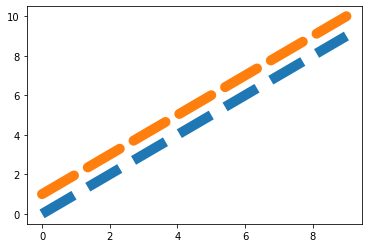

In [40]:
plt.plot(np.arange(10), linestyle='--', linewidth=10)
plt.plot(np.arange(10) + 1, linestyle='--', linewidth=10, dash_capstyle='round');

## Markers

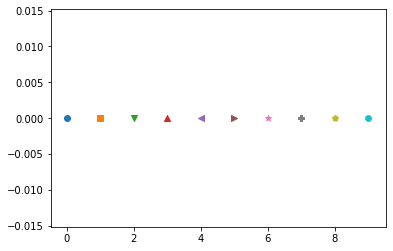

In [41]:
for index, symbol in enumerate(list('osv^<>*Pp8')):
    plt.scatter([0 + index], [0], marker=symbol);

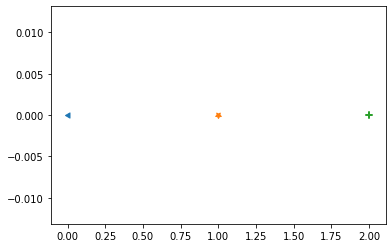

In [42]:
plt.scatter([0], [0], marker=(3, 0, 330));
plt.scatter([1], [0], marker=(5, 1, 180));
plt.scatter([2], [0], marker=(4, 2, 0));

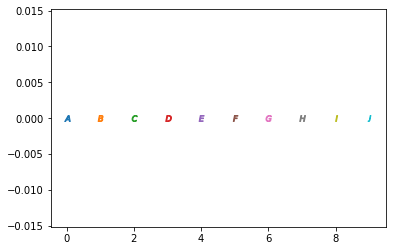

In [43]:
import string
for index, char in enumerate(string.ascii_uppercase[:10]):
    plt.scatter([0 + index], [0], marker='${}$'.format(char));

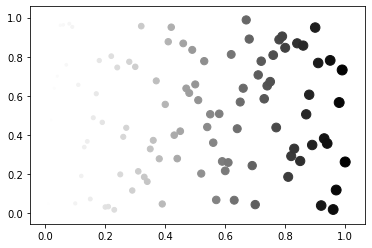

In [44]:
plt.scatter(np.linspace(0, 1, 101), np.random.uniform(size=101), s=np.linspace(0, 1, 101) * 100,
           c=np.linspace(0, 1, 101), cmap='Greys');

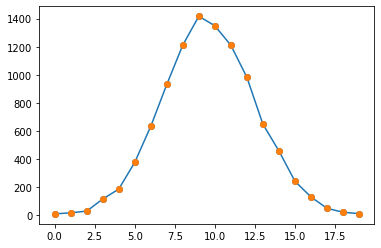

In [45]:
counts = helper.get_normal_counts()
plt.plot(counts, marker='o');
plt.plot(counts, marker='o', ls='None');

## Legends

In [46]:
years = range(2015, 2019)
data = dict(zip(years, [helper.precip_sums_for_year(year=y) for y in years]))

for key in data.keys():
    data[key] = [month[1] for month in data[key]]

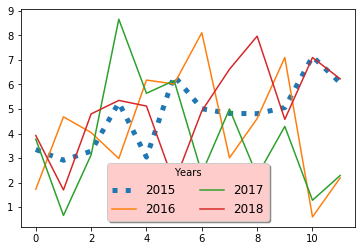

In [47]:
handles = []
for key in sorted(data.keys()):
    line = plt.plot(data[key], label=str(key))[0];
    handles.append(line)
handles[0].set_lw(5)
handles[0].set_ls(':')
plt.legend(loc=8, ncol=2, facecolor='#FFCCCC', fontsize='large', shadow=True, title='Years');

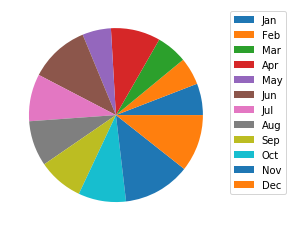

In [48]:
wedges, _ = plt.pie(data[2015]);
plt.legend(wedges, helper.MONTHS, bbox_to_anchor=(1.0, 1.0));

# Creating advanced visualization

## Subplots and layouts

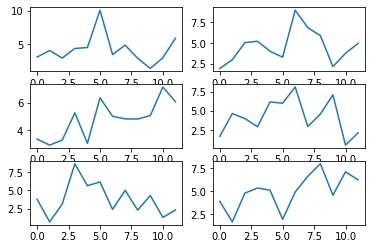

In [49]:
precip = {}

for year in np.arange(2013, 2019):
    sums = helper.precip_sums_for_year(year)
    precip[year] = [month[1] for month in sums]
    
for index, key in enumerate(precip.keys()):
    plt.subplot(3, 2, index + 1)
    plt.plot(precip[key])

## Advanced text

Text(3, 6, '1.7 in.')

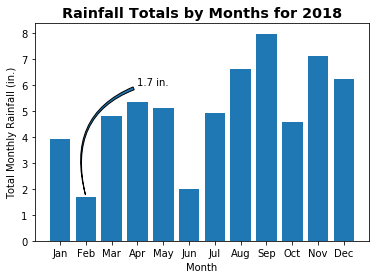

In [50]:
precip_2018 = [month[1] for month in helper.precip_sums_for_year()]

plt.bar(np.arange(len(precip_2018)), precip_2018)
plt.xticks(ticks=np.arange(len(helper.MONTHS)), labels=helper.MONTHS);
plt.title('Rainfall Totals by Months for 2018', fontdict={
    'size': 'x-large',
    'weight': 'bold'
})
plt.ylabel('Total Monthly Rainfall (in.)')
plt.xlabel('Month')
# plt.text(8, 7.75, '7.97 in.', withdash=True, dashlength=25)
plt.annotate('1.7 in.', (1, 1.7), (3, 6), arrowprops={
    'connectionstyle': 'arc3, rad=0.5',
    'arrowstyle': 'wedge'
})

## Pandas and matplotlib

In [52]:
import pandas as pd

precip = dict(zip(np.arange(2015, 2019), [helper.precip_sums_for_year(year=year) for year in np.arange(2015, 2019)]))
for key in precip:
    precip[key] = [month[1] for month in precip[key]]
    
df = pd.DataFrame(precip)
df.index = helper.MONTHS
df.head()

,2015,2016,2017,2018
Jan,3.35,1.73,3.77,3.92
Feb,2.91,4.68,0.66,1.70
Mar,3.28,4.04,3.13,4.80
Apr,5.26,2.98,8.66,5.35
May,3.04,6.18,5.64,5.12


array([<matplotlib.axes._subplots.AxesSubplot object at 0x122d77b90>,
      dtype=object)

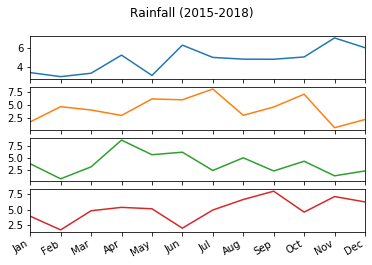

In [53]:
df[df.columns[:4]].plot(xticks=np.arange(12), subplots=True, title='Rainfall (2015-2018)', legend=False)

## Seaborn

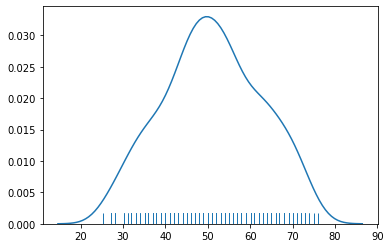

In [55]:
import seaborn as sns
jan_temps = helper.monthly_data_by_key(month=1, key='temperaturemax')
sns.distplot(jan_temps, rug=True, hist=False)

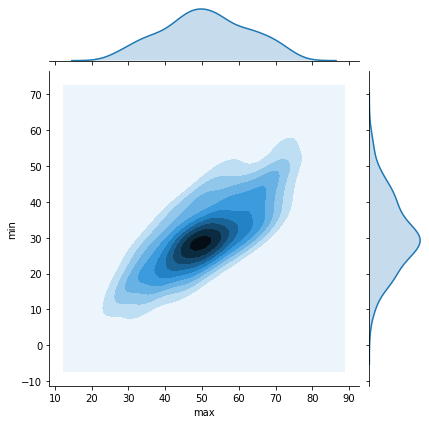

In [56]:
min_temps = helper.monthly_data_by_key(month=1, key='temperaturemin')
df = pd.DataFrame(data=[jan_temps, min_temps])
df = df.T
df.columns = ['max', 'min']
sns.jointplot(x='max', y='min', data=df, kind='kde')

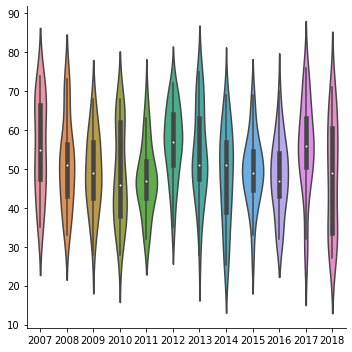

In [57]:
the_weather = dict(zip(sorted(helper.weather_by_date.keys()), [helper.weather_by_date[year][1] for year in sorted(helper.weather_by_date.keys())]))
for key in the_weather.keys():
    the_weather[key] = [day['temperaturemax'] for day in the_weather[key]]

df = pd.DataFrame(the_weather)
sns.catplot(kind='violin', data=df)